# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras

## For Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

## For Functional
from tensorflow.keras import Model

# Functional API Model
### We must define input shape and output shape for functional API

In [4]:
## Layers for Input 1
input_layer1 = Input(shape=(32,), name='input_layer_1') ## Input Layer 1
block1_hidden_layer1 = Dense(units=32, activation='relu', name='block1_hidden_layer1')(input_layer1) ## Hidden Layer 1 for Input Layer 1
block1_hidden_layer2 = Dense(units=8, activation='relu', name='block1_hidden_layer2')(block1_hidden_layer1) ## Hidden Layer 2 for Input Layer 1

## Layers for Input 2
input_layer2 = Input(shape=(128,), name='input_layer_2') ## Input Layer 2
block2_hidden_layer1 = Dense(units=128, activation='relu', name='block2_hidden_layer1')(input_layer2) ## Hidden Layer 1 for Input Layer 2
block2_hidden_layer2 = Dense(units=64, activation='relu', name='block2_hidden_layer2')(block2_hidden_layer1) ## Hidden Layer 2 for Input Layer 2
block2_hidden_layer3 = Dense(units=32, activation='relu', name='block2_hidden_layer3')(block2_hidden_layer2) ## Hidden Layer 3 for Input Layer 2

## Concatenating Layer
combined_layer = concatenate([block1_hidden_layer2, block2_hidden_layer3])

## Common Layers
block3_hidden_layer1 =  Dense(units=8, activation='relu', name='block3_hidden_layer1')(combined_layer)

## Output Layer
output_layer = Dense(units=1, activation='sigmoid', name='output_layer')(block3_hidden_layer1)

In [6]:
## Define Model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.name = 'Functional Model'
model.summary()

Model: "Functional Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_hidden_laye… │ (None, 128)       │     16,512 │ input_layer_2[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_hidden_laye… │ (None, 32)        │      1,056 │ input_layer_1[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_hidden_laye… │ (None, 64)        │      8,256 │ block2_hidden_la… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_hidden_laye… │ (None, 8)         │        264 │ block1_hidden_la… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_hidden_laye… │ (None, 32)        │      2,080 │ block2_hidden_la… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 40)        │          0 │ block1_hidden_la… │
│ (Concatenate)       │                   │            │ block2_hidden_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_hidden_laye… │ (None, 8)         │        328 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │          9 │ block3_hidden_la… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,505 (111.35 KB)

 Trainable params: 28,505 (111.35 KB)

 Non-trainable params: 0 (0.00 B)

# Visualize Model

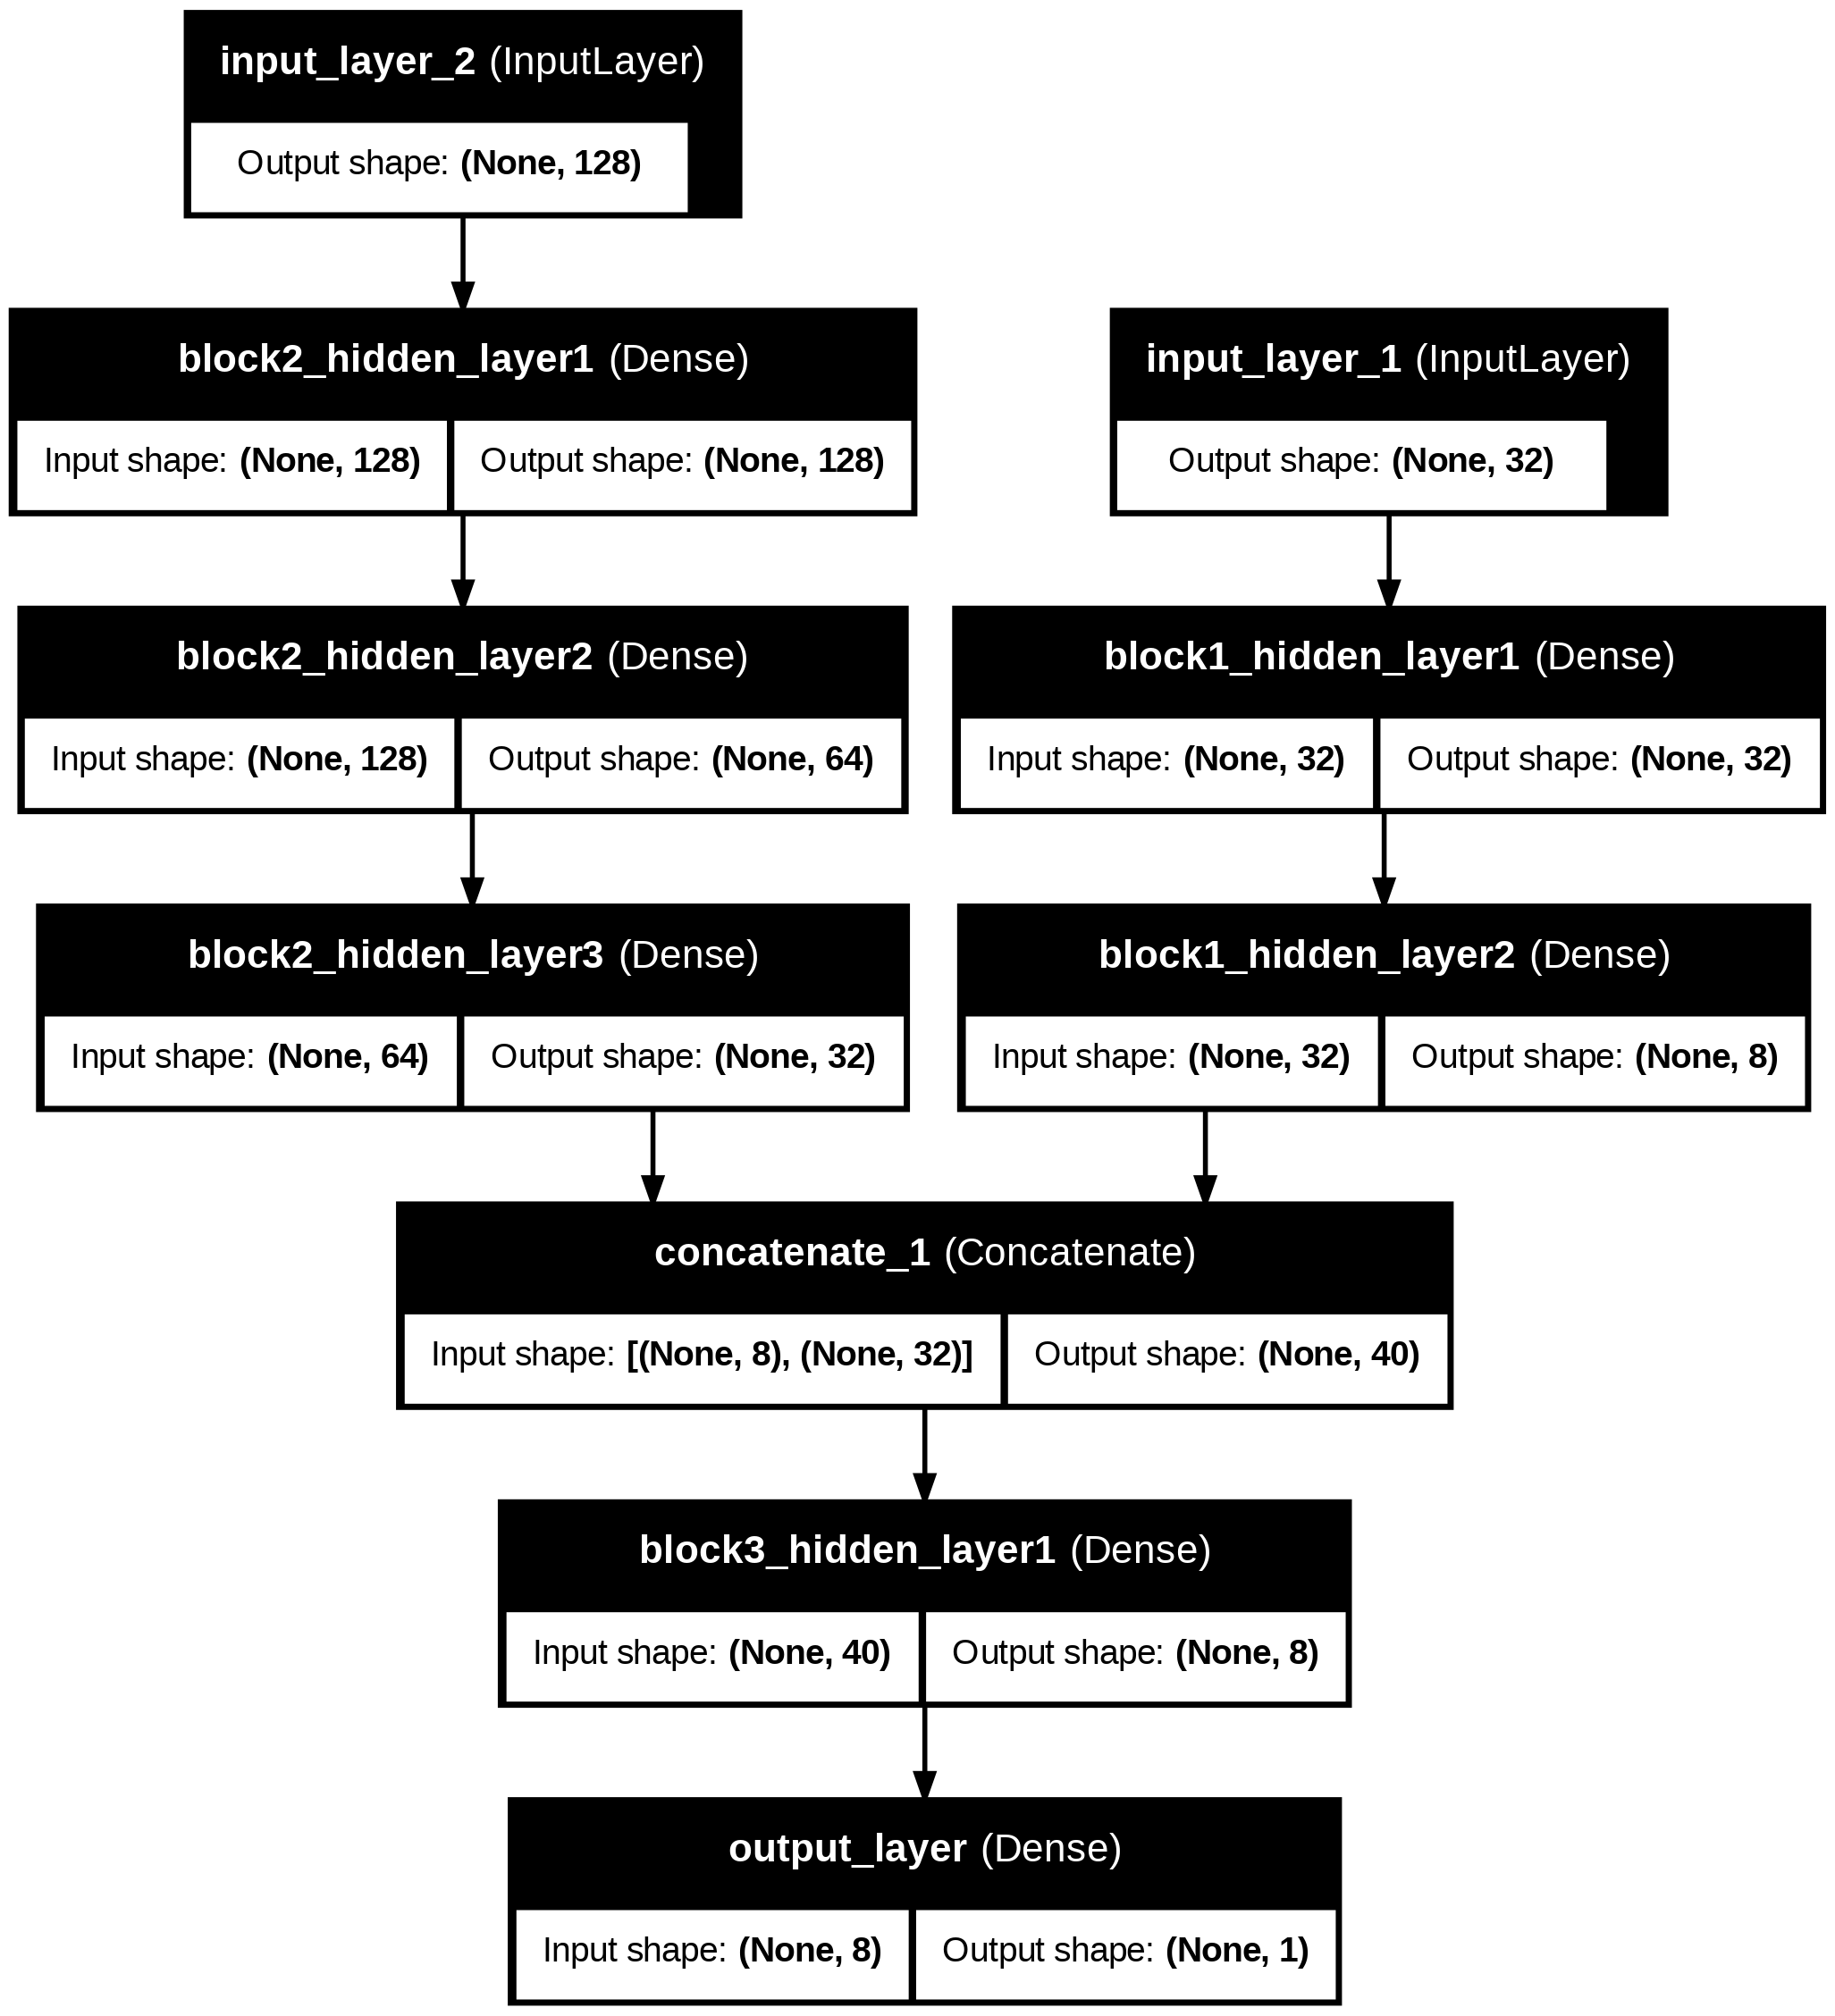

In [8]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_problem2.png')